In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./iris.data.csv')

In [4]:
df.shape

(150, 5)

In [5]:
df.head()

,a,b,c,d,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
y = df['class']

In [9]:
X = df[['a','b','c','d']]

In [116]:
classifier = LogisticRegression()
classifier.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [117]:
X_test = np.array([[5.1,3.5,1.4,0.2],[4.9,3,1.4,0.2]])
predicted_y = classifier.predict(X_test)

In [118]:
predicted_y

array(['Iris-setosa', 'Iris-setosa'], dtype=object)

In [119]:
test = pd.read_csv('./iris.test.csv')

In [120]:
testX = test[['a','b','c','d']]

In [121]:
ret = classifier.predict(testX)

In [122]:
ret

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [123]:
testY = test['class']

In [124]:
testY

0        Iris-setosa
1    Iris-versicolor
2     Iris-virginica
Name: class, dtype: object

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2)

In [128]:
lr = LogisticRegression()
scores = []
train_sizes = range(10,len(X_train),10)

In [129]:
for s in train_sizes:
    X_slice,_,y_slice,_ = train_test_split(X_train,y_train,train_size=s,stratify=y_train)
    lr.fit(X_slice,y_slice)
    scores.append(lr.score(X_test,y_test))

C:\Users\ohwada\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


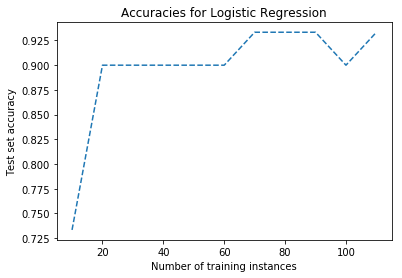

In [130]:
plt.plot(train_sizes,scores,linestyle='--',label='Logistic Regression')
plt.title('Accuracies for Logistic Regression')
plt.xlabel('Number of training instances')
plt.ylabel('Test set accuracy');